# Comestibility of mushrooms: classification by AI

Author : Hugo Wattelar

In June 2019, Réserves Naturelles de France and INPN (Inventaire National du Patrimoine Naturel) published a [report](https://inpn.mnhn.fr/docs/communication/livretInpn/livret_etatdeslieux_patnat_dans_les_reserves_naturelles_2019.pdf) taking stock of France's natural heritage in nature reserves. Nearly 30,000 species of mushroom were inventoried in mainland France. Although they come in a wide variety of shapes, sizes and textures, only a handful of them are edible (around a hundred according to [France Assos Santé](https://www.france-assos-sante.org/2015/09/18/champignon-un-cueilleur-averti-en-vaut-deux/)). In addition, almost 2,000 cases of mushroom poisoning were reported to poison control centres between 1 July and 31 December 2022 (https://www.francebleu.fr/infos/environnement/champignons-plus-de-250-cas-d-intoxication-depuis-le-1er-aout-gare-aux-applications-de-reconnaissance-2907091).

The aim of this tutorial is to use different Machine Learning algorithms to differentiate between poisonous and edible mushrooms on the basis of their characteristics.

We're going to use the [Mushroom Dataset] database (https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset). This database contains 23 different mushroom families.

In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## 1 Loading and exploring the database

We start by loading and understanding the data structure.

<span style="color: red"> Question:</span> How many mushrooms are described in this database? By how many characteristics?

In [ ]:
data = pd.read_csv("mushrooms.csv").drop_duplicates()
data.shape

(8124, 23)

<span style="color: red"> TODO:</span> Uncomment the rows below one by one to explore the data and understand its structure. View some samples of the database. What do you notice?

<span style="color: blue"> TODO:</span> All variables are categorical variables so we can't use them like that for Machine Learning.


In [ ]:
data.head()
# data.info()
# data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<span style="color: red"> TODO:</span> Display the number of edible (class 0) and poisonous (class 1) mushrooms, possibly as a histogram.

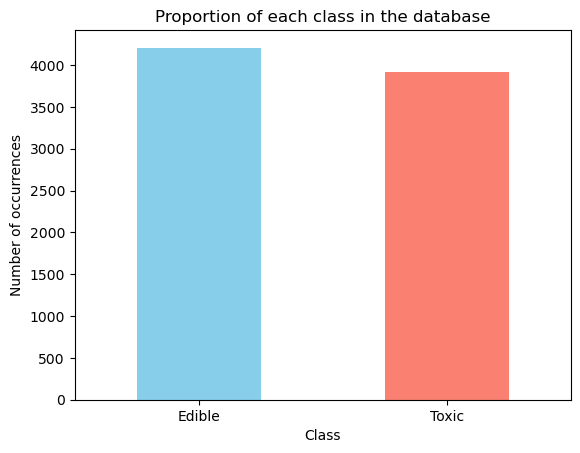

In [ ]:
data['class'].value_counts().plot(kind='bar', color=["skyblue", "salmon"])
plt.title("Proportion of each class in the database")
plt.xlabel("Class")
plt.ylabel("Number of occurrences")
plt.xticks([0, 1], ['Edible', 'Toxic'], rotation=0);

## 2. Data pre-processing

We separate the labels from the characteristics, then separate our dataset into a training database and a test database.

In [ ]:
X = data.drop("class", axis=1)
y = data["class"]

The data contains many categorical variables. This means that some variables are described by labels (e.g. hat colour) rather than by continuous numerical values (e.g. stem length). Similarly, labels are described by a letter ("p" for "poisonous" and "e" for "edible").
However, most machine learning models require continuous or discrete numerical input values.

In the case of labels, given that there are only two different labels, all we have to do is convert the labels into "0" and "1". We arbitrarily choose "e" --> 0 and "p" --> 1. This method is called __Label Encoding__.

In the case of variables, most are represented by more than two labels. For example, there are 6 different colours for the hat in the database. You can't simply convert the labels into integers from 1 to 6 at the risk of introducing a hierarchy in the colours, which could bias the model. Another method of avoiding this pitfall is to convert the categorical variable with N distinct labels into N binary variables: 1 if the characteristic is present, 0 otherwise. This is called __One-Hot Encoding__.

For example: we have a `Colour` variable which can take 3 different values: `red`, `green`, `blue`. To one-hot encode this variable, we first convert the labels `red`,`green`, `blue` into integers `[0,1,2]`. Then we create 3 binary variables `Red_colour`, `Green_colour`, `Blue_colour`: 1 if the variable corresponds to the colour indicated by the variable name, 0 otherwise. Finally, if all the possible colours are described by these variables, we arbitrarily delete one of the 3 variables, taking the view that if 2 of the variables are 0, then it must be the 3rd colour. This is the trap of dummy variables__.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # Application du label encoding aux labels

X = pd.get_dummies(X, drop_first=True, dtype=int) # Application du one-hot encoding aux variables catégorielles + on retire la première variable crée pour éviter le piège des dummy variables
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<span style="color: red"> TODO:</span> Display the new number of variables.

In [ ]:
print("Variable name =", len(X.columns))

Variable name = 95


## 3. Learning an ML model for edible/toxic classification with all variables

In this section, we learn different ML models from the Scikit-Learn library to classify mushrooms as edible or toxic.

We start by separating the database into a training database, a validation database and a test database, taking care to maintain the proportion of each class in each sub-database (`stratify=y`).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

<span style="color: red"> TODO:</span> Train the following ML models with the training base: [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). We will optimise the main parameters by cross-validation ([GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)) on the training base, and then display the performance of the optimised model on the test base. We will choose accuracy as the metric.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### 3.1 Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
params_rf = {
    'n_estimators': range(10, 200, 20)
}

optimizer_rf = GridSearchCV(estimator = rf, param_grid = params_rf, scoring = 'accuracy', cv = 3)
optimizer_rf_fit = optimizer_rf.fit(X_train, y_train)

In [ ]:
best_rf = optimizer_rf_fit.best_estimator_
print(best_rf)
print("Mean accuracy of the best model :", optimizer_rf_fit.best_score_)

RandomForestClassifier(n_estimators=10, random_state=42)
Mean accuracy of the best model : 0.9992308875557606


In [ ]:
y_pred_rf = best_rf.predict(X_test)
print("Accuracy on the test set :", accuracy_score(y_test, y_pred_rf))

Accuracy on the test set : 1.0


### 3.2 Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
params_lr = {
    'C': [0.1, 1, 10, 100],
}

optimizer_lr = GridSearchCV(estimator = lr, param_grid = params_lr, scoring = 'accuracy', cv = 3)
optimizer_lr_fit = optimizer_lr.fit(X_train, y_train)

In [ ]:
best_lr = optimizer_lr_fit.best_estimator_
print(best_lr)
print("Mean accuracy of the best model :", optimizer_lr_fit.best_score_)

LogisticRegression(C=1, max_iter=1000, random_state=42)
Mean accuracy of the best model : 0.9992308875557606


In [ ]:
y_pred_lr = best_lr.predict(X_test)
print("Accuracy on the test set :", accuracy_score(y_test, y_pred_lr))

Accuracy on the test set : 0.9987692307692307


<span style="color: red"> Question:</span> comment on the results obtained. Which model do you choose? Why or why not?

<span style="color: blue"> Answer:</span> Both models achieve similar performances on the test. But the random forest is 100% accuracy so it seems to be the best one.


## 4 - Study of model explainability

The explicability of an ML model refers to the ability to understand and interpret a decision/prediction made by a model. Explanability is fundamental in several respects: the confidence we can have in a model, the transparency of the model, its conformity and, of course, for ethical reasons.

In this section, we will study the influence of the different variables in the database on the decision-making of a model, and question the explicability and interpretability of models.

### 4.1 Random Forest

When a random forest is trained, the model calculates and stores the importance of characteristics, such as the average drop in impurity allowed by the use of the characteristic. These importances show which features are most important in the model's decision-making, but their value does not indicate whether these features have a positive or negative influence on decision-making. They are accessible in the `feature_importances_` field of the trained model.

<span style="color: red"> TODO:</span> Display the importance of the features by completing the code below.

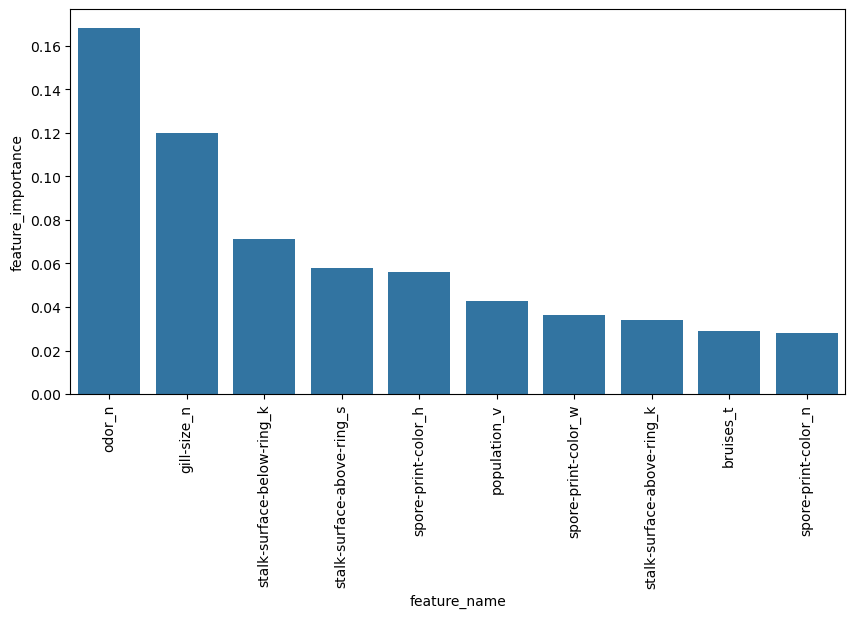

In [ ]:
feature_importance_df = pd.DataFrame({'feature_importance': best_rf.feature_importances_, 'feature_name': X_train.columns})
feature_importance_df.sort_values('feature_importance', ascending = False, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(feature_importance_df.head(10), x="feature_name", y="feature_importance")
plt.xticks(rotation=90);

### 4.2 Logistic Regression

The __odds ratios__ in a logistic regression measure the effect of a variation in a characteristic on the probability of the target event (here, toxic or not), by comparing the odds of an event between two different values of this feature. The odds ratio is obtained by exponentiating the coefficients of the logistic regression. If an odds ratio is greater than 1, this means that an increase in the variable corresponds to an increase in the chances of the event occurring, and vice versa for a coefficient less than 1. The comparison is made in relation to the category that was removed during the one-hot encoding of the categorical variables (`drop_first=True`).

As explained above, the feature importances in a Random Forest represent the contribution of each feature to the reduction of the impurity (for example, the Gini index or the entropy) in the decision trees. Unlike odds ratios, which are specific to each coefficient in the logistic regression and depend directly on the units of the variables, Random Forest feature importances are relative scores indicating the importance of a feature in the overall model, independently of the form of the variables. They should not therefore be confused or compared.

<span style="color: red"> TODO:</span> Display the odds ratios of the features by completing the code below.

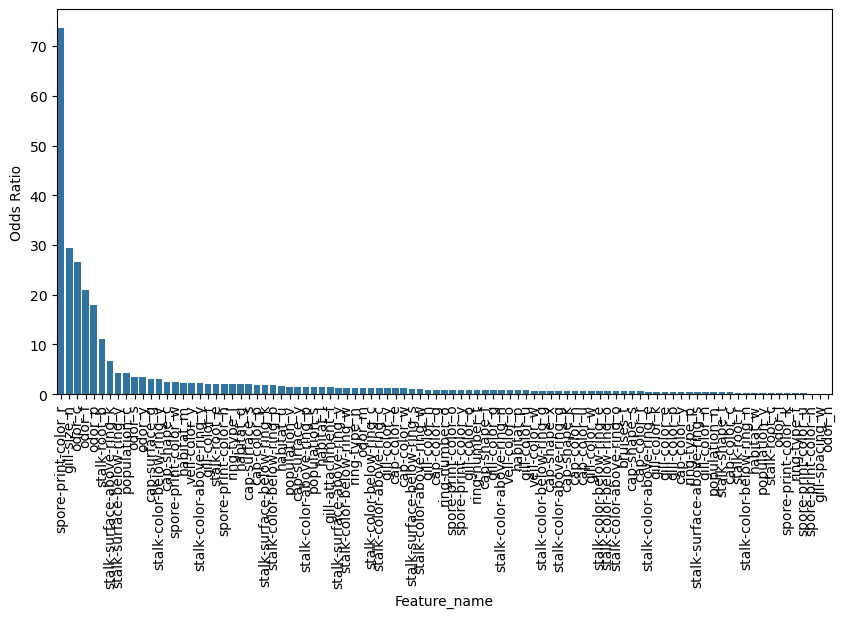

In [ ]:
coefficients = best_lr.coef_[0]
odds_ratios = np.exp(coefficients)
feature_importance = pd.DataFrame({
    'Feature_name': X_train.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
feature_importance.sort_values(by="Odds Ratio", ascending=False, inplace=True)
plt.figure(figsize=(10, 5))
sns.barplot(feature_importance, x="Feature_name", y='Odds Ratio')
plt.xticks(rotation=90);

## 5. Reducing the number of variables

Reducing the number of variables in the database is an effective way of reducing the size and consumption of an ML model: fewer calculations, less complexity, improved interpretability and explicability. It also limits overlearning. There are several ways of selecting the most relevant variables:

* Filtered methods: eliminating variables with low variance, Chi-2 method, mutual information, etc.
* Wrapped methods: evaluation of the model with subsets of variables until the best combination is found (RFE, Forward Selection, Backward Elimination).
* Integrated methods: the most relevant variables are automatically selected when the model is trained (feature_importance, L1 regularisation, etc.).
* Heuristic methods, dimensionality reduction: PCA, etc.

In this tutorial, we are going to use three different methods: a filtered method (Chi-2 method), an enveloped method (Recursive Feature Elimination) and an integrated method (feature importance for Random Forest and L1 regularisation for Logistic Regression).

### 5.1 Chi-2 (or Chi-Square) method



The Chi2 method assesses the dependence between each categorical variable and the target using the χ² test. It measures whether the distribution of the values of the variable differs significantly according to the class of the sample, and retains only the variables with a strong association.

<span style="color: red"> TODO:</span> Complete the code below.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector_chi2 = SelectKBest(chi2, k=10)  # Garde les 10 meilleures features
X_train_reduced_chi2 = selector_chi2.fit_transform(X_train, y_train)
X_test_reduced_chi2 = selector_chi2.transform(X_test)

print("Selected features with Chi-2 method:")
print(selector_chi2.get_feature_names_out())

best_rf.fit(X_train_reduced_chi2, y_train)
y_pred_rf_chi2 = best_rf.predict(X_test_reduced_chi2)
print("Test accuracy score RF =", accuracy_score(y_test, y_pred_rf_chi2))

best_lr.fit(X_train_reduced_chi2, y_train)
y_pred_lr_chi2 = best_lr.predict(X_test_reduced_chi2)
print("Test accuracy score LR =", accuracy_score(y_test, y_pred_lr_chi2))

Selected features with Chi-2 method:
['bruises_t' 'odor_f' 'odor_n' 'gill-size_n' 'stalk-surface-above-ring_k'
 'stalk-surface-below-ring_k' 'ring-type_l' 'ring-type_p'
 'spore-print-color_h' 'spore-print-color_n']
Test accuracy score RF = 0.9778461538461538
Test accuracy score LR = 0.976


### 5.2 Recursive Feature Elimination (RFE)



The RFE (Recursive Feature Elimination) method selects variables by training a model, assessing the importance of each variable, then iteratively eliminating the least important until the desired number of variables is reached.

<span style="color: red"> TODO:</span> Complete the code below.

In [ ]:
from sklearn.feature_selection import RFE

rf = RandomForestClassifier()
selector_rf_rfe = RFE(rf, n_features_to_select=10)  # Garde 10 features
X_train_rf_rfe = selector_rf_rfe.fit_transform(X_train, y_train)
X_test_rf_rfe = selector_rf_rfe.transform(X_test)

print("Selected features with RFE method:")
print(selector_rf_rfe.get_feature_names_out())

best_rf.fit(X_train_rf_rfe, y_train)
y_pred_rf_rfe = best_rf.predict(X_test_rf_rfe)
print("Accuracy score RF =", accuracy_score(y_test, y_pred_rf_rfe))

Selected features with RFE method:
['bruises_t' 'odor_f' 'odor_n' 'gill-size_n' 'stalk-shape_t'
 'stalk-root_b' 'stalk-surface-above-ring_k' 'stalk-surface-below-ring_k'
 'ring-type_p' 'population_v']
Accuracy score RF = 0.9969230769230769


In [ ]:
lr = LogisticRegression()
selector_lr_rfe = RFE(lr, n_features_to_select=10)  # Garde 10 features
X_train_lr_rfe = selector_lr_rfe.fit_transform(X_train, y_train)
X_test_lr_rfe = selector_lr_rfe.transform(X_test)

print("Selected features with RFE method:")
print(selector_lr_rfe.get_feature_names_out())

best_lr.fit(X_train_lr_rfe, y_train)
y_pred_lr_rfe = best_lr.predict(X_test_lr_rfe)
print("Accuracy score LR =", accuracy_score(y_test, y_pred_lr_rfe))

Selected features with RFE method:
['odor_c' 'odor_f' 'odor_n' 'odor_p' 'gill-size_n'
 'stalk-surface-above-ring_k' 'spore-print-color_k' 'spore-print-color_n'
 'spore-print-color_r' 'spore-print-color_u']
Accuracy score LR = 0.9963076923076923


### 5.3 Integrated method (feature importance and L1 adjustment)




A Random Forest model calculates the importance of variables by measuring their average contribution to the reduction in impurity (such as the Gini index or entropy) at each split, then averaging these contributions over all the trees in the forest.

<span style="color: red"> TODO:</span> Complete the code below.

In [ ]:
X_train_feature_importance = X_train.loc[:, X_train.columns.isin(feature_importance_df.head(10).feature_name)]
X_test_feature_importance = X_test.loc[:, X_test.columns.isin(feature_importance_df.head(10).feature_name)]

print("Selected features based on feature importance :")
print(X_test_feature_importance.columns)

best_rf.fit(X_train_feature_importance, y_train)
y_pred_rf_feature_importance = best_rf.predict(X_test_feature_importance)
print("Accuracy score RF =", accuracy_score(y_test, y_pred_rf_feature_importance))

Selected features based on feature importance :
Index(['bruises_t', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k',
       'spore-print-color_h', 'spore-print-color_n', 'spore-print-color_w',
       'population_v'],
      dtype='object')
Accuracy score RF = 0.9796923076923076


The L1 regularisation in a logistic regression model imposes a penalty on the sum of the absolute values of the coefficients, which causes some coefficients to become equal to zero, thereby automatically selecting the most relevant features by eliminating those with zero coefficients.

<span style="color: red"> TODO:</span> Complete the code below.

In [ ]:
lr = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

params_lr = {
    'C': [0.1, 1, 10, 100],
}

optimizer_lr = GridSearchCV(estimator = lr, param_grid = params_lr, scoring = 'accuracy', cv = 3)
optimizer_lr_fit = optimizer_lr.fit(X_train, y_train)

best_lr = optimizer_lr_fit.best_estimator_
print(best_lr)

selected_features = X_train.columns[best_lr.coef_[0]!=0].values
print("Selected features based on L1 regularization :")
print(selected_features)
print("Number of selected features :", len(selected_features))

y_pred_lr_l1 = best_lr.predict(X_test)
print("Accuracy on the test set :", accuracy_score(y_test, y_pred_lr_l1))

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Selected features based on L1 regularization :
['cap-shape_x' 'cap-surface_g' 'cap-color_w' 'cap-color_y' 'odor_c'
 'odor_f' 'odor_l' 'odor_n' 'odor_p' 'gill-spacing_w' 'gill-size_n'
 'gill-color_n' 'stalk-root_c' 'stalk-surface-above-ring_k'
 'stalk-surface-above-ring_s' 'stalk-surface-below-ring_s'
 'stalk-color-above-ring_w' 'stalk-color-below-ring_n' 'veil-color_w'
 'spore-print-color_k' 'spore-print-color_n' 'spore-print-color_r'
 'spore-print-color_u' 'spore-print-color_w' 'population_c' 'population_y'
 'habitat_w']
Number of selected features : 27
Accuracy on the test set : 1.0


<span style="color: red"> Question:</span> For each feature selection method seen in this exercise, compare and comment on the features selected.

<span style="color: blue"> Answer:</span> Some variables are often selected ( liek bruises_t and odor_n) but selected variables are not always the same. It certainly depends on the model and the selection method.
